In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
#import keras
from matplotlib import rc
rc("text", usetex=True)
rc("font", family = "serif")
rc("figure",figsize=(6,4))
%config InlineBackend.figure_format = 'retina'
from phase_mixing_utils import *
from skimage import data
import skimage

In [5]:
ft_blobs = np.fft.fft2(blobs)
#phase_intensity_plot(np.fft.fftshift(ft_blobs)[100:150,100:150])

Blobs arent the most fun fourier transform. Zooming in is good though.

In [6]:
ft_hdf = np.fft.fft2(hdf)
#phase_intensity_plot(np.fft.fftshift(ft_hdf))

Lesson: dont want image to be too high res

In [7]:
plt.imshow(np.real_if_close(np.fft.ifft2(ft_blobs)))
#plt.show()

In [8]:
def sq_lat(n,p):
    """Generate a nxn square lattice with period p
        The first lattice point is at [(p-1)/2,(p-1)/2"""
    lattice = np.zeros((n,n))
    for i in range(40):
        for j in range(40):
            lattice[(p-1)/2+p*i,(p-1)/2+p*j] = 1
    return lattice
lat = sq_lat(200,5)

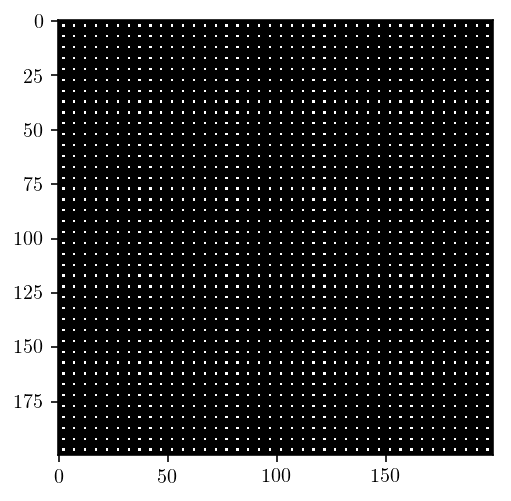

In [9]:
plt.imshow(lat,cmap="gray")
plt.show()

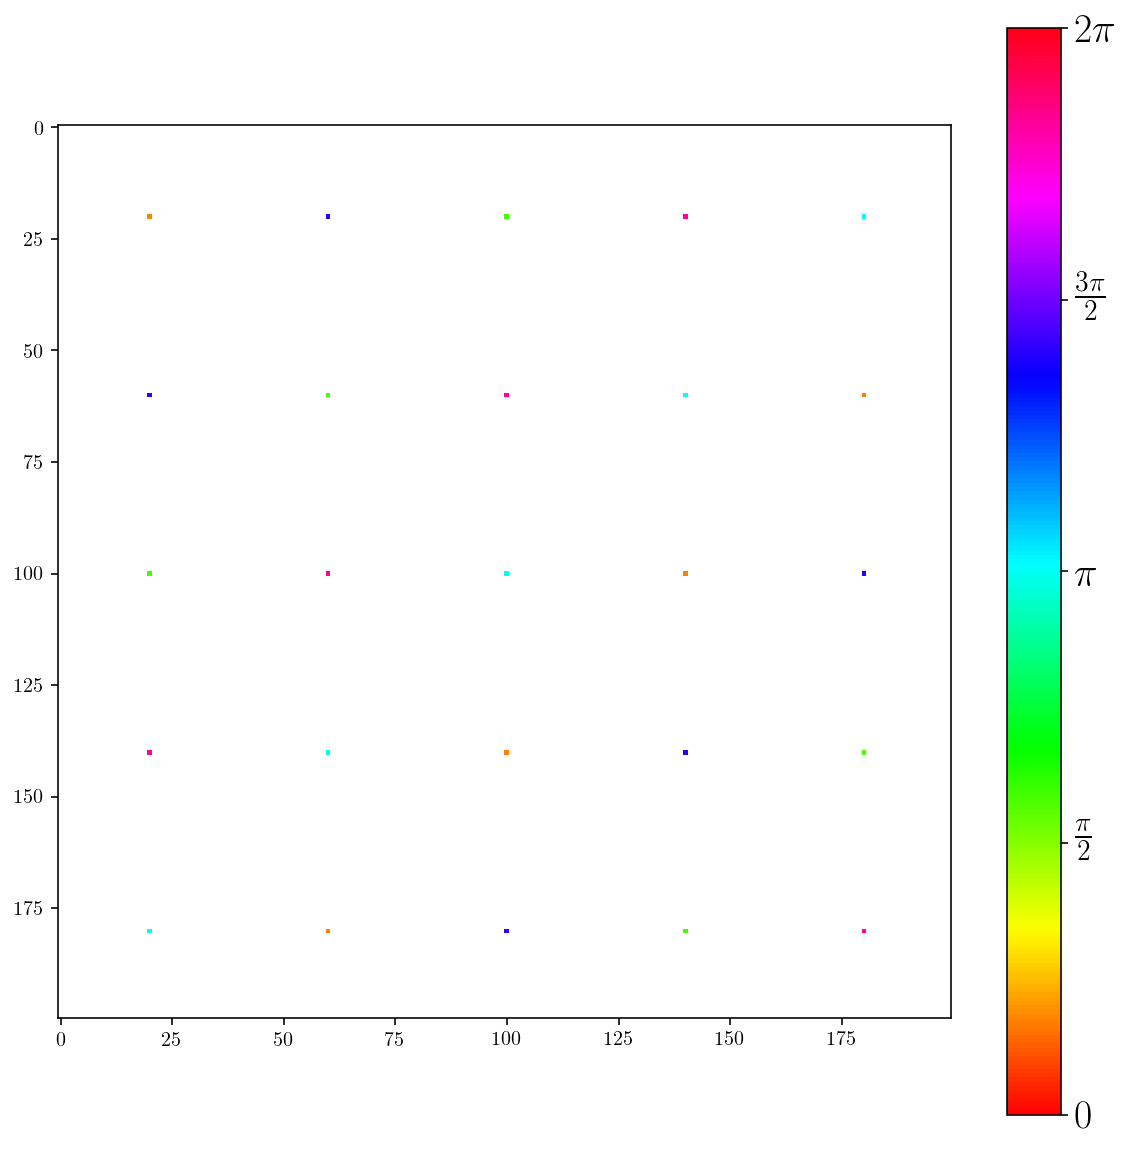

In [10]:
ft_lat = np.fft.fft2(lat)
phase_intensity_plot(np.fft.fftshift(ft_lat))

FT of sqare lattice is a sqare lattice 

Try a lattice with structure - square lattice with a 3 pixel L basis

In [11]:
unit_cell = np.zeros((5,5))
unit_cell[3,3]=1
unit_cell[3,2]=1
unit_cell[2,3]=1
lat2 = np.tile(unit_cell,(40,40))
plt.figure(figsize=(10,10))
plt.imshow(lat2)
#plt.show()

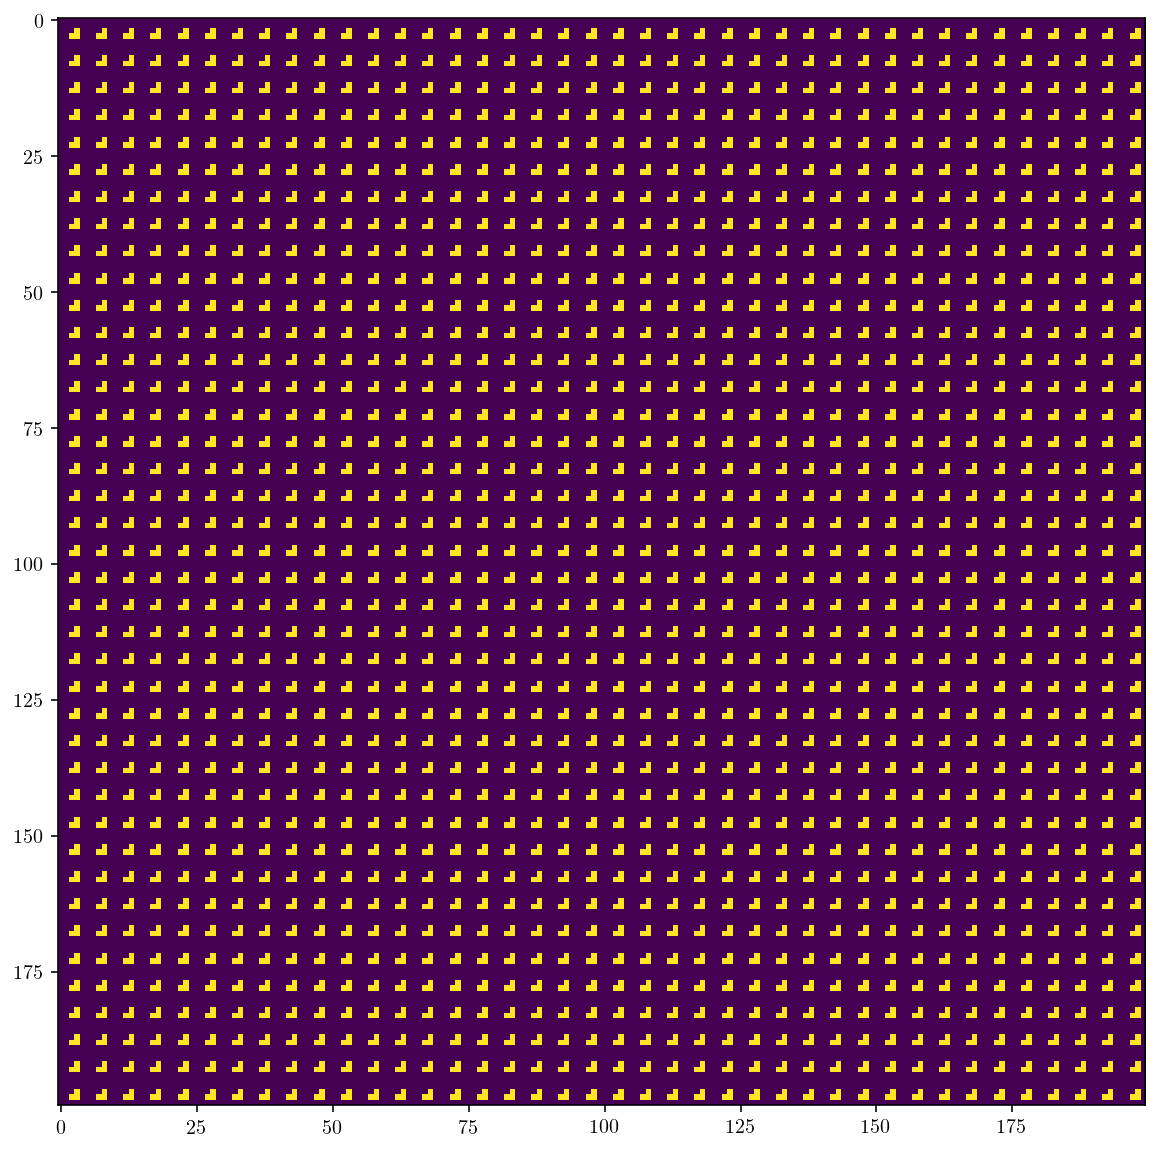

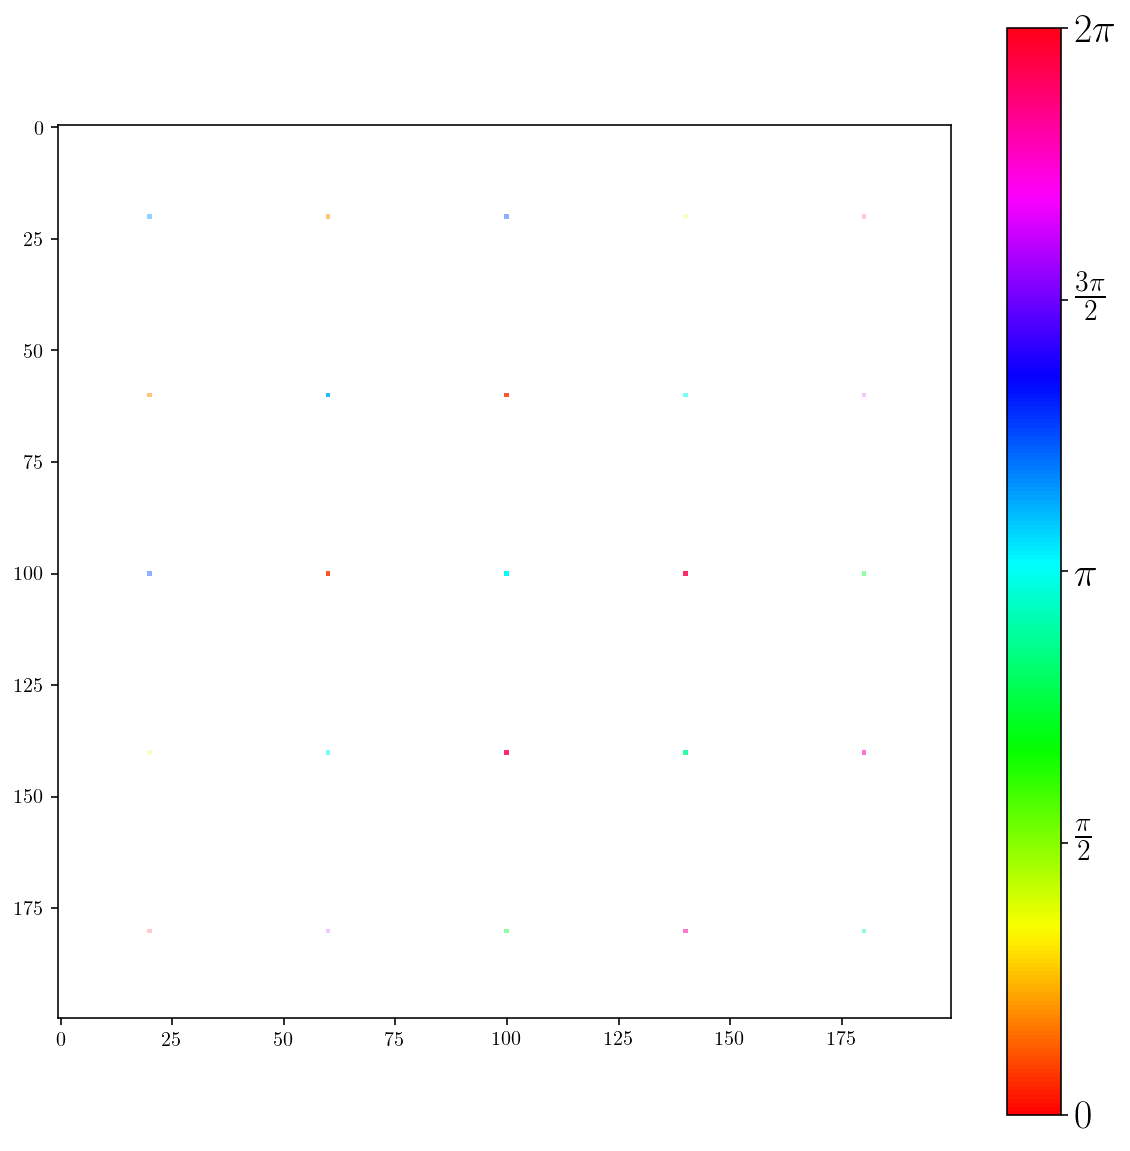

In [12]:
ft_lat2 = np.fft.fft2(lat2)
phase_intensity_plot(np.fft.fftshift(ft_lat2))

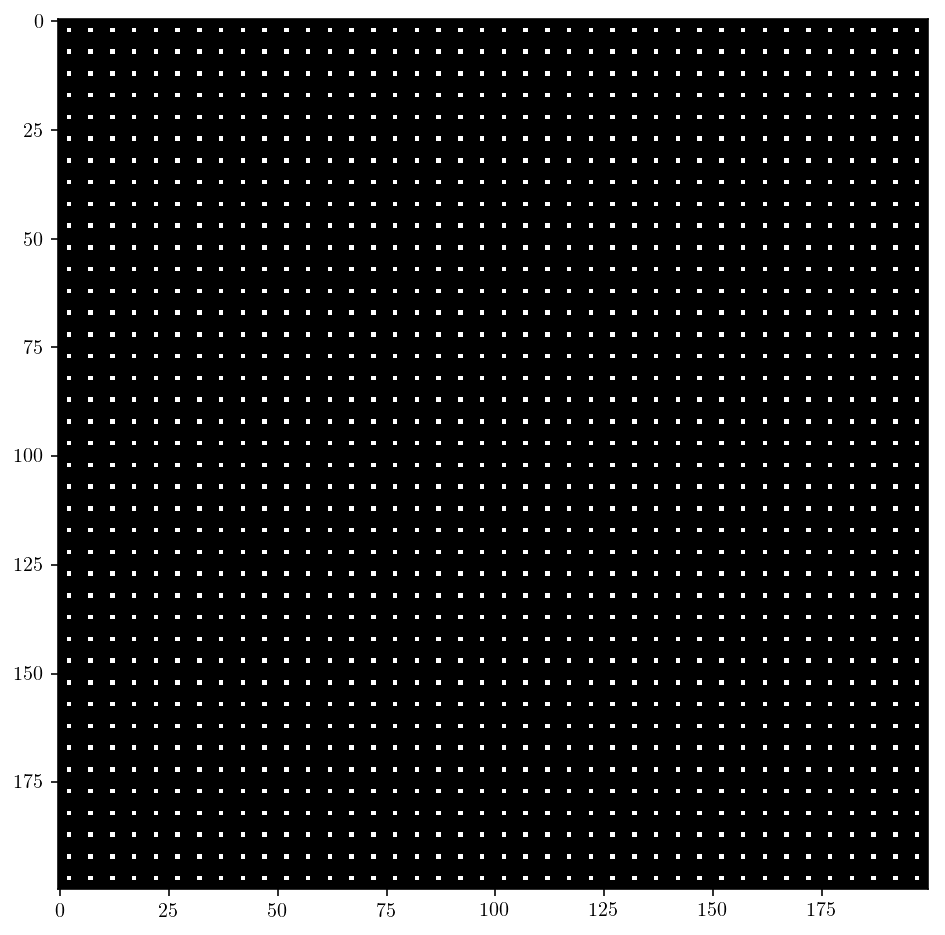

In [13]:
smpl_sq_mag = get_mag(ft_lat)
basis_sq_phase = get_phase(ft_lat2)
basis_smpl = mix_FT(lat,lat)
#phase_intensity_plot(basis_smpl)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(np.real(np.fft.ifft2(basis_smpl)),cmap="gray")
plt.show()

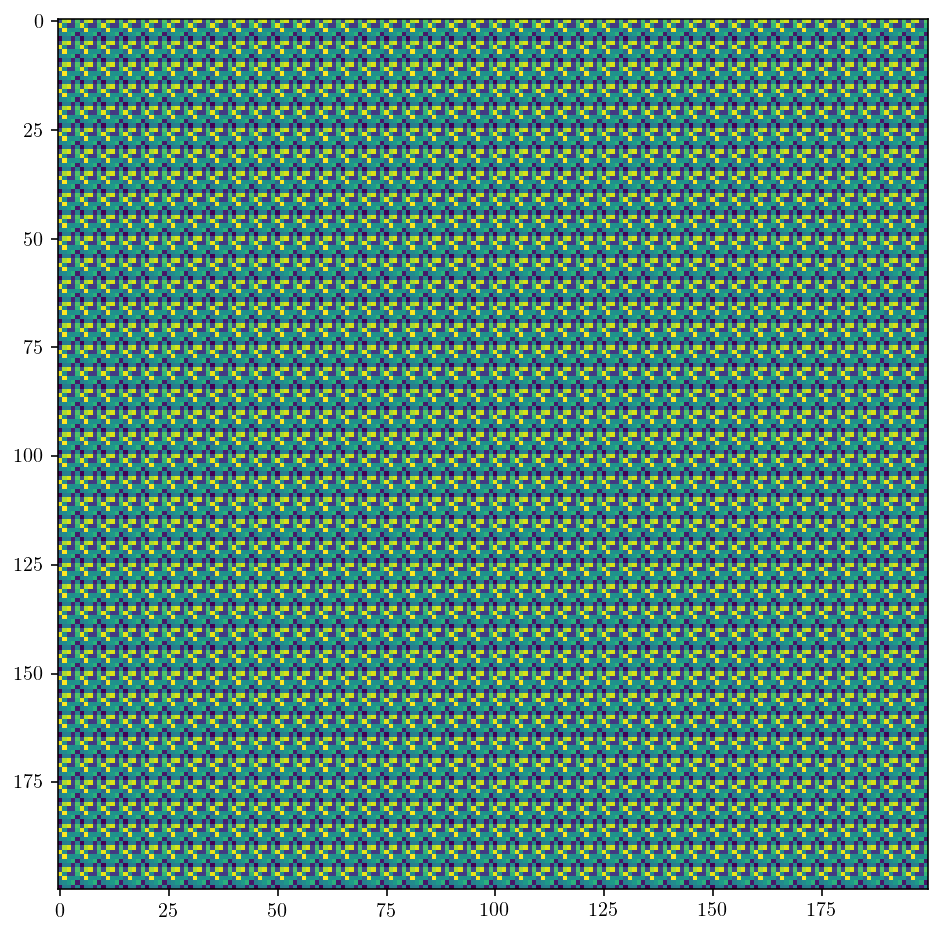

In [14]:
random = np.random.random((200,200))
smpl_sq_rphases = mix_FT(lat,random)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(np.real(np.fft.ifft2(smpl_sq_rphases)))
plt.show()

In [4]:
from scipy.stats import multivariate_normal

In [24]:
def gaussian_lattice(n_atoms,uc_size,n_tiles, means):
    """ Create a square lattice composed of unit cells each containg n_atoms gaussians of unit variance
        Lattice dimensions are (uc_size*n_tiles)x(uc_size*n_tiles)
        Means is an array of locations for the gaussians - each value must be less than uc_size
        Default variance is uc_size/10
        Output is an array containg the lattice"""
    uc = np.zeros((uc_size,uc_size))
    X,Y = np.meshgrid(np.arange(uc_size),np.arange(uc_size))
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X; pos[:, :, 1] = Y
    for i in range(n_atoms):
        mvn = multivariate_normal(mean=means[i],cov = uc_size/10.)
        uc = uc + mvn.pdf(pos)
    #return uc
    return np.tile(uc,(n_tiles,n_tiles))

In [30]:
mu = np.array([[20,20],[50,90],[80,30]])

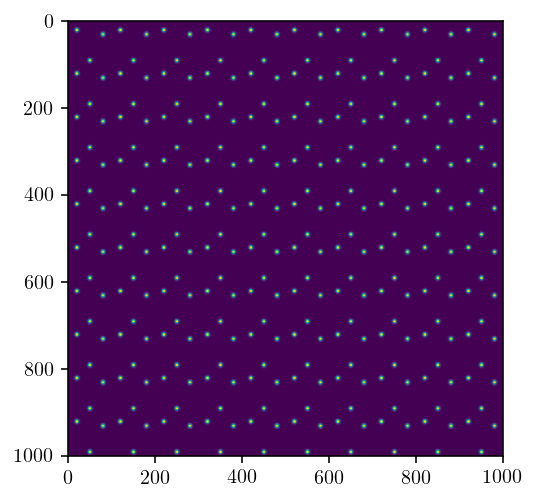

In [31]:
plt.imshow(gaussian_lattice(3,100,10,mu))
plt.show()

In [39]:
th = np.linspace(0,2*np.pi,11)
circ_mu = np.array([[50+20*np.cos(t),50+20*np.sin(t)] for t in th[:-1]])

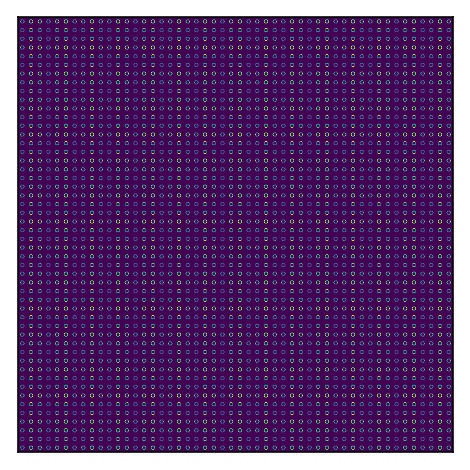

In [51]:
plt.imshow(gaussian_lattice(10,100,50, circ_mu))
plt.xticks([])
plt.yticks([])
plt.show()

In [68]:
rings = gaussian_lattice(10,500,20, circ_mu)
ft_rings = np.fft.fft2(rings)

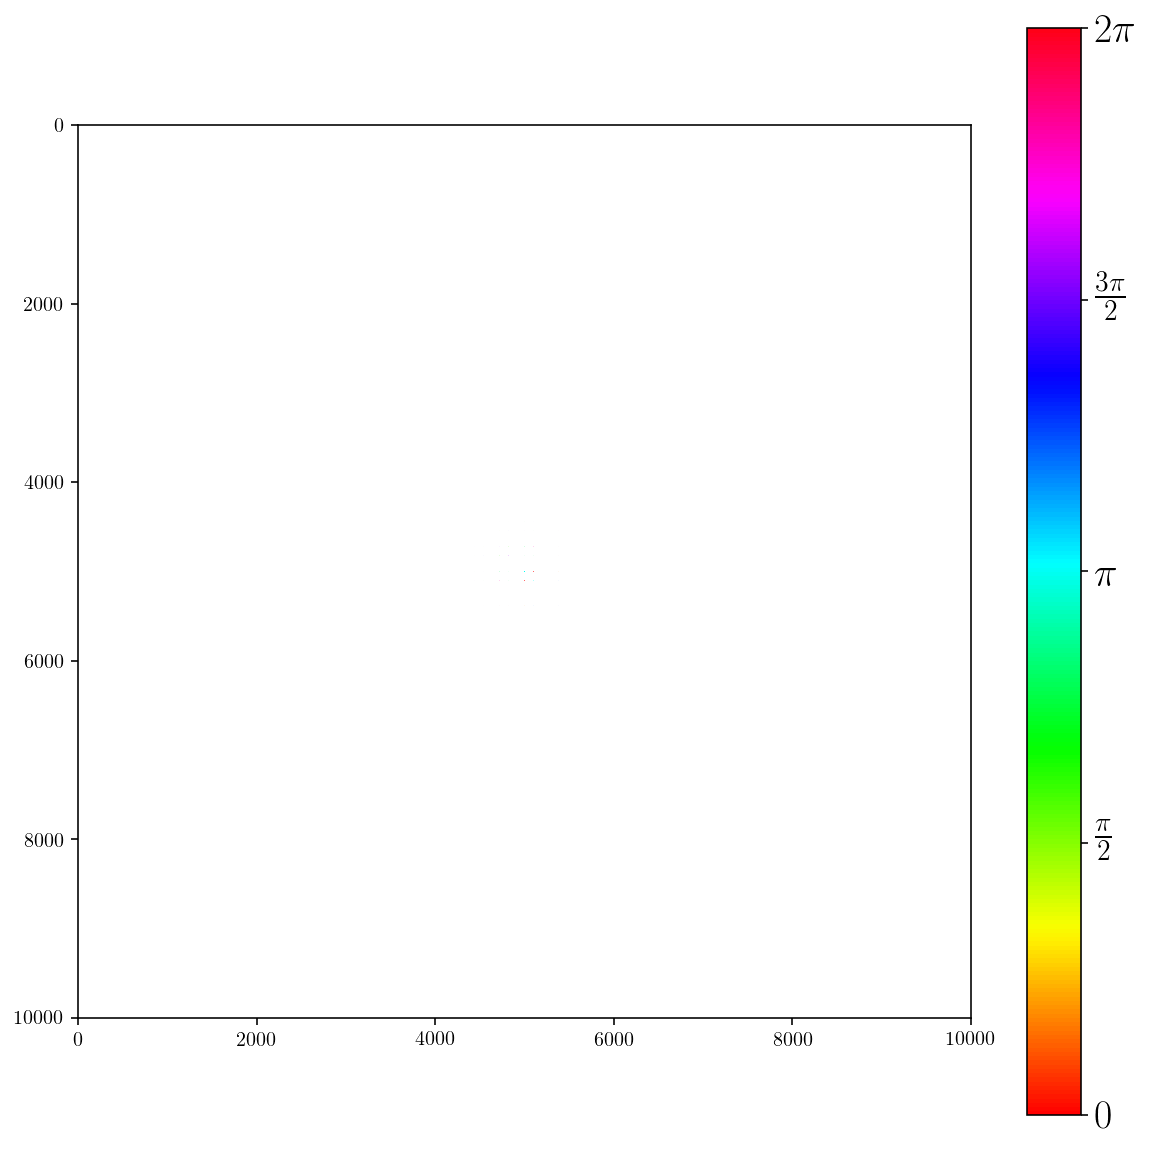

In [69]:
phase_intensity_plot(np.fft.fftshift(ft_rings))

In [72]:
np.sum(ft_rings[ft_rings>0])

(324468.81016449444-1.2457016067360846e-09j)